In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from utils import setup_xkcd

setup_xkcd()

In [2]:
url = (
    "https://www.ers.usda.gov/media/1r4nwtsu/"
    "data-on-expenditures-on-food-and-alcoholic-"
    "beverages-in-selected-countries.xlsx"
)

data = (
    pd.read_excel(url, sheet_name="2021", header=None)
    .iloc[6:110]
    .rename(
        columns = {
            0: "Country",
            1: "Food_Share",
            2: "Alcohol_Share",
            3: "Total_Expenditures",
            4: "Food_Expenditures",
        }
    )
    .set_index("Country")
)

# Plot 1

In [3]:
plot_1 = (
    data
    .assign(NonFood_Expenditure=lambda df: df["Total_Expenditures"] - df["Food_Expenditures"])
    .loc[["Nigeria", "USA"], ["Total_Expenditures", "Food_Expenditures", "NonFood_Expenditure"]]
    .div(1e3)
)
plot_1

,Total_Expenditures,Food_Expenditures,NonFood_Expenditure
Country,,,
Nigeria,1.268578,0.748615,0.519962
USA,45.898055,3.070234,42.827821


Text(0, 0.5, '1000 $')

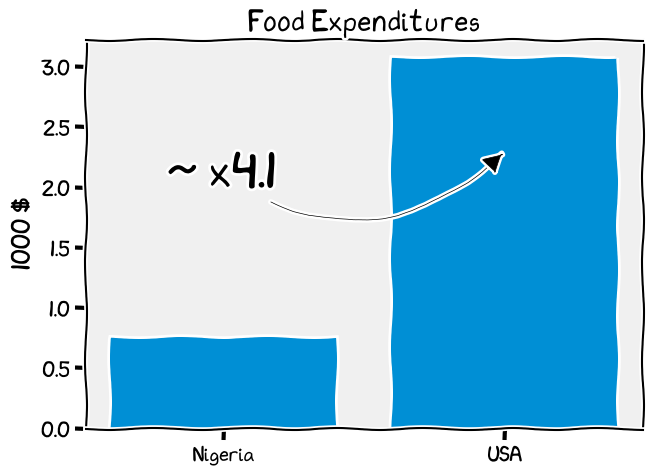

In [4]:
usvsng = round(plot_1.loc["USA", "Food_Expenditures"] / plot_1.loc["Nigeria", "Food_Expenditures"], 1)

fig, ax = plt.subplots()

ax.bar(x=plot_1.index, height=plot_1["Food_Expenditures"])

ax.annotate(
    f"~ x{usvsng}",
    xy=(1, 2.3),
    xytext=(-0.2, 2),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
    fontsize=32,
)
ax.set_title("Food Expenditures")
ax.set_ylabel("1000 $")

Text(0, 0.5, '1000 $')

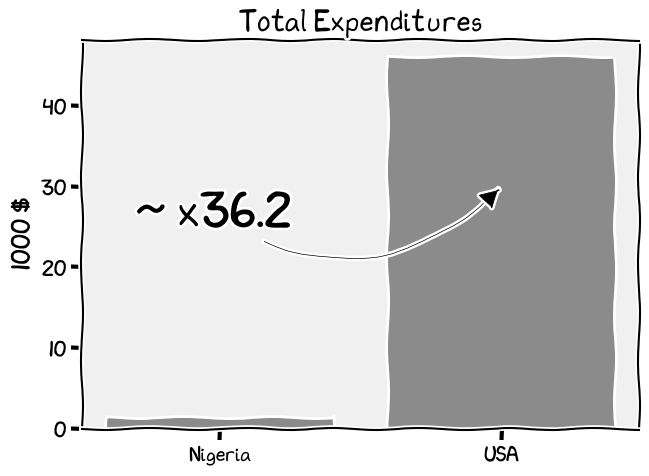

In [5]:
usvsng = round(plot_1.loc["USA", "Total_Expenditures"] / plot_1.loc["Nigeria", "Total_Expenditures"], 1)

fig, ax = plt.subplots()

ax.bar(x=plot_1.index, height=plot_1["Total_Expenditures"], color="#8b8b8b")

ax.annotate(
    f"~ x{usvsng}",
    xy=(1, 30),
    xytext=(-0.3, 25),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
    fontsize=32,
)

ax.set_title("Total Expenditures")
ax.set_ylabel("1000 $")

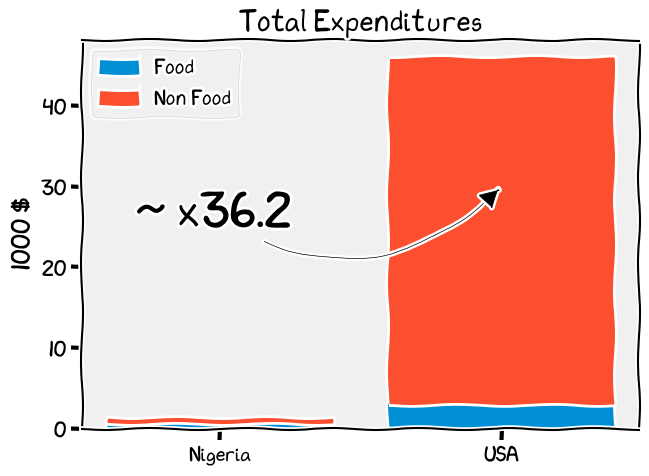

In [6]:
fig, ax = plt.subplots()

ax.bar(x=plot_1.index, height=plot_1["Food_Expenditures"], label="Food")
ax.bar(x=plot_1.index, height=plot_1["NonFood_Expenditure"], bottom=plot_1["Food_Expenditures"], label="Non Food")

ax.annotate(
    f"~ x{usvsng}",
    xy=(1, 30),
    xytext=(-0.3, 25),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
    fontsize=32,
)

ax.set_title("Total Expenditures")
ax.set_ylabel("1000 $")
ax.legend()

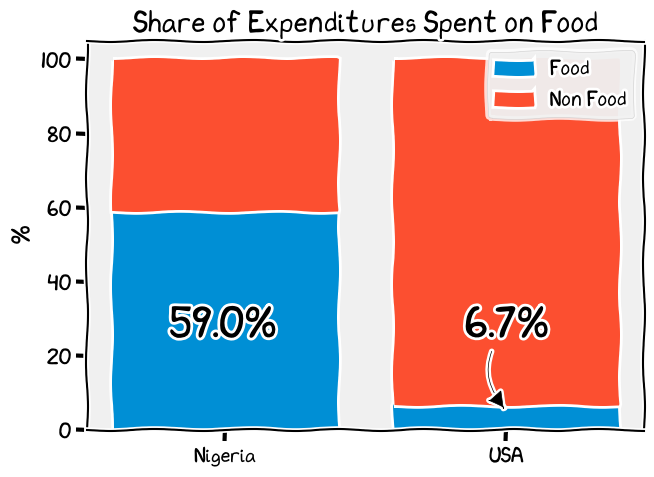

In [7]:
usvsng = (plot_1["Food_Expenditures"] / plot_1["Total_Expenditures"] * 100)

fig, ax = plt.subplots()

ax.bar(
    x=plot_1.index,
    height=plot_1["Food_Expenditures"] / plot_1["Total_Expenditures"] * 100,
    label = "Food"
)
ax.bar(
    x=plot_1.index,
    height=plot_1["NonFood_Expenditure"] / plot_1["Total_Expenditures"] * 100,
    bottom=plot_1["Food_Expenditures"] / plot_1["Total_Expenditures"] * 100,
    label = "Non Food"
)

ax.text(-0.2, 25, f"{round(usvsng['Nigeria'], 1)}%",fontsize=28)
ax.annotate(
    f"{round(usvsng['USA'], 1)}%",
    xy=(1, 5),
    xytext=(0.85, 25),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
    fontsize=28,
)

ax.set_title("Share of Expenditures Spent on Food")
ax.set_ylabel("%")
ax.legend()

In [8]:
plot_2 = (
    data
    .loc[:, ["Food_Share", "Total_Expenditures"]]
    .drop(["Venezuela"])
    .assign(Color=lambda df: df.index.isin(["USA", "Nigeria"]))
)

(5.0, 62.0)

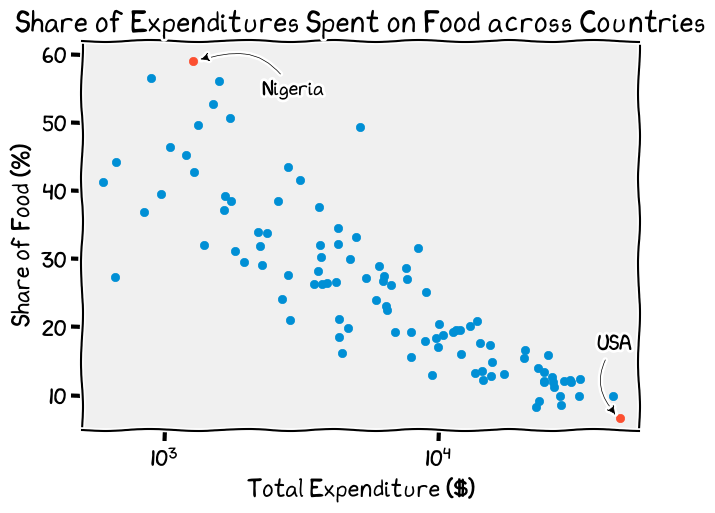

In [9]:
fig, ax = plt.subplots()

ax.scatter(plot_2["Total_Expenditures"].loc[- plot_2["Color"]], plot_2["Food_Share"].loc[- plot_2["Color"]])
ax.scatter(plot_2["Total_Expenditures"].loc[plot_2["Color"]], plot_2["Food_Share"].loc[plot_2["Color"]])
ax.set_xscale("log", base=10)

ax.annotate(
    "USA",
    xy=(
        plot_2.loc["USA", "Total_Expenditures"] - 1e3,
        plot_2.loc["USA", "Food_Share"] + 0.2,
    ),
    xytext=(
        plot_2.loc["USA", "Total_Expenditures"] - 8e3,
        plot_2.loc["USA", "Food_Share"] + 10,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
    # fontsize=28,
)

ax.annotate(
    "Nigeria",
    xy=(
        plot_2.loc["Nigeria", "Total_Expenditures"] + 50,
        plot_2.loc["Nigeria", "Food_Share"] + 0.1,
    ),
    xytext=(
        plot_2.loc["Nigeria", "Total_Expenditures"] + 1e3,
        plot_2.loc["Nigeria", "Food_Share"] - 5,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
)

ax.set_title("Share of Expenditures Spent on Food across Countries")
ax.set_ylabel("Share of Food (%)")
ax.set_xlabel("Total Expenditure ($)")
ax.set_xlim(0.5e3, 5.4e4)
ax.set_ylim(5, 62)

(5.0, 62.0)

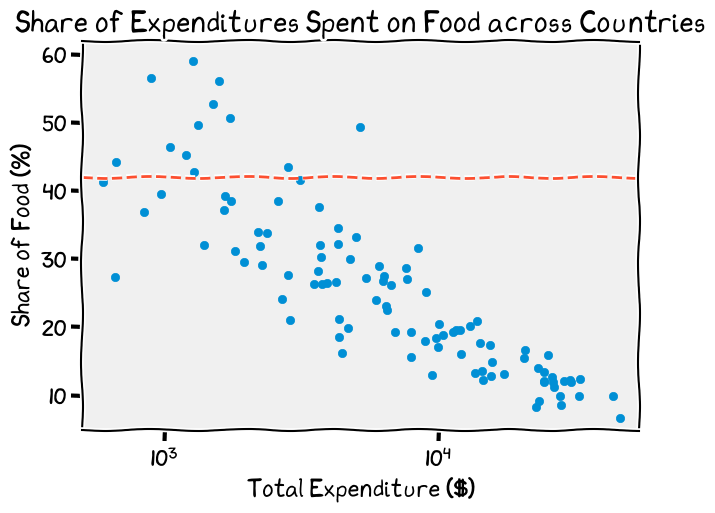

In [10]:
fig, ax = plt.subplots()

ax.scatter(plot_2["Total_Expenditures"], plot_2["Food_Share"])
ax.plot([0.5e3, 5.4e4], [42, 42], color="#fc4f30", linestyle="--")
ax.set_xscale("log", base=10)

ax.set_title("Share of Expenditures Spent on Food across Countries")
ax.set_ylabel("Share of Food (%)")
ax.set_xlabel("Total Expenditure ($)")
ax.set_xlim(0.5e3, 5.4e4)
ax.set_ylim(5, 62)

In [11]:
plot_2.query("40 < Food_Share < 44")

,Food_Share,Total_Expenditures,Color
Country,,,
Ethiopia,41.309013,592.440328,False
Ukraine,41.641058,3103.07663,False
Cambodia,42.712592,1279.365845,False
Azerbaijan,43.555817,2809.143106,False


(5.0, 62.0)

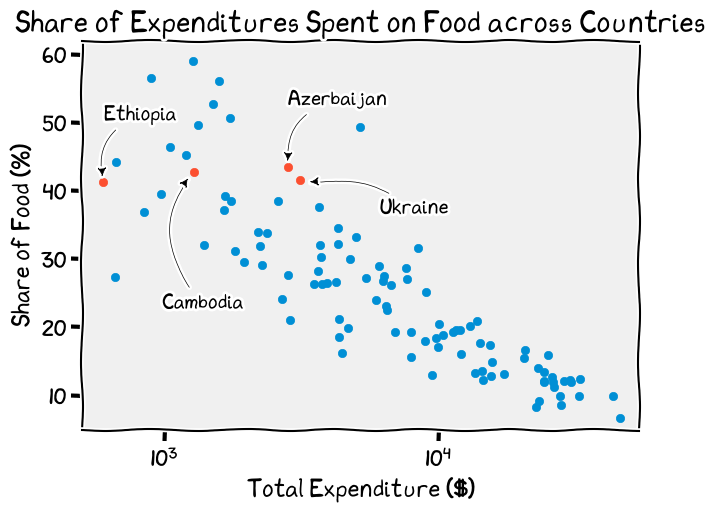

In [12]:
fig, ax = plt.subplots()

ax.scatter(plot_2.query("Food_Share < 40 or 44 < Food_Share")["Total_Expenditures"], plot_2.query("Food_Share < 40 or 44 < Food_Share")["Food_Share"])
ax.scatter(plot_2.query("40 < Food_Share < 44")["Total_Expenditures"], plot_2.query("40 < Food_Share < 44")["Food_Share"])
ax.set_xscale("log", base=10)

ax.annotate(
    "Ethiopia",
    xy=(
        plot_2.loc["Ethiopia", "Total_Expenditures"] + 1,
        plot_2.loc["Ethiopia", "Food_Share"] + 0.4,
    ),
    xytext=(
        plot_2.loc["Ethiopia", "Total_Expenditures"] + 8,
        plot_2.loc["Ethiopia", "Food_Share"] + 9,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
)
ax.annotate(
    "Cambodia",
    xy=(
        plot_2.loc["Cambodia", "Total_Expenditures"] - 50,
        plot_2.loc["Cambodia", "Food_Share"] - 0.5,
    ),
    xytext=(
        plot_2.loc["Cambodia", "Total_Expenditures"] - 300,
        plot_2.loc["Cambodia", "Food_Share"] - 20,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=-0.4",
        color="black",
    ),
)
ax.annotate(
    "Azerbaijan",
    xy=(
        plot_2.loc["Azerbaijan", "Total_Expenditures"] + 1,
        plot_2.loc["Azerbaijan", "Food_Share"] + 0.4,
    ),
    xytext=(
        plot_2.loc["Azerbaijan", "Total_Expenditures"] + 8,
        plot_2.loc["Azerbaijan", "Food_Share"] + 9,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
)
ax.annotate(
    "Ukraine",
    xy=(
        plot_2.loc["Ukraine", "Total_Expenditures"] + 2e2,
        plot_2.loc["Ukraine", "Food_Share"] - 0.4,
    ),
    xytext=(
        plot_2.loc["Ukraine", "Total_Expenditures"] + 3e3,
        plot_2.loc["Ukraine", "Food_Share"] - 5,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.2",
        color="black",
    ),
)

ax.set_title("Share of Expenditures Spent on Food across Countries")
ax.set_ylabel("Share of Food (%)")
ax.set_xlabel("Total Expenditure ($)")
ax.set_xlim(0.5e3, 5.4e4)
ax.set_ylim(5, 62)

(5.0, 62.0)

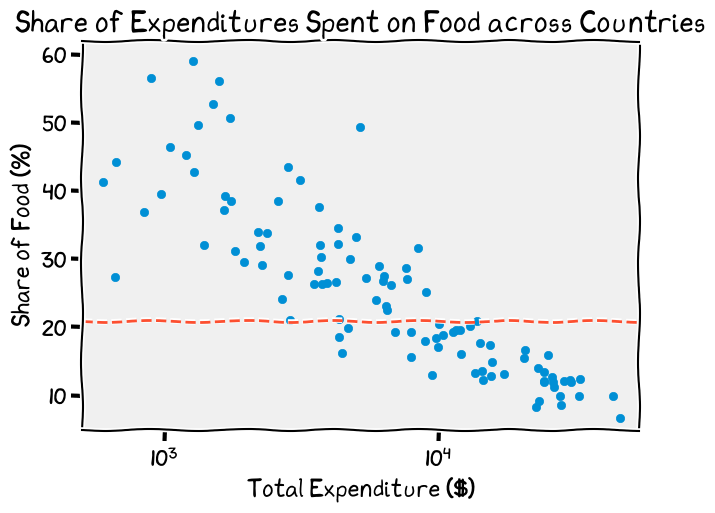

In [13]:
fig, ax = plt.subplots()

ax.scatter(plot_2["Total_Expenditures"], plot_2["Food_Share"])
ax.plot([0.5e3, 5.4e4], [21, 21], color="#fc4f30", linestyle="--")
ax.set_xscale("log", base=10)

ax.set_title("Share of Expenditures Spent on Food across Countries")
ax.set_ylabel("Share of Food (%)")
ax.set_xlabel("Total Expenditure ($)")
ax.set_xlim(0.5e3, 5.4e4)
ax.set_ylim(5, 62)

In [14]:
plot_2.query("20.5 < Food_Share < 22")

,Food_Share,Total_Expenditures,Color
Country,,,
Saudi Arabia,20.549966,9996.364435,False
Lithuania,20.98476,13750.974711,False
Lebanon,21.020599,2864.302829,False
South Africa,21.292362,4324.868712,False


(5.0, 62.0)

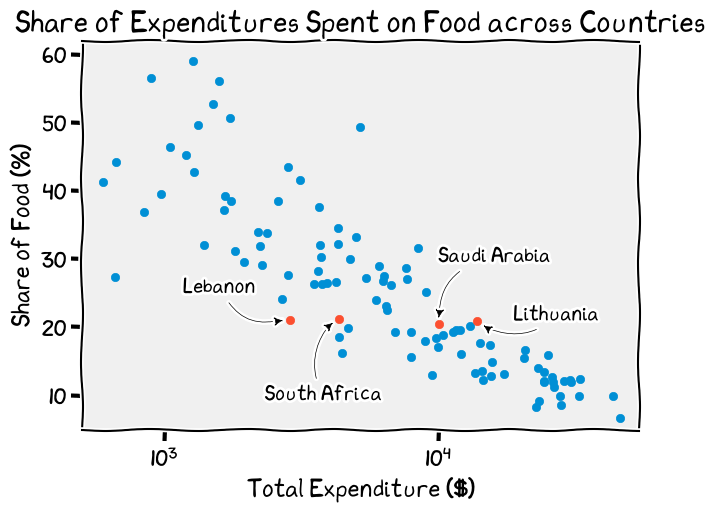

In [15]:
fig, ax = plt.subplots()

ax.scatter(plot_2.query("Food_Share < 20.5 or 22 < Food_Share")["Total_Expenditures"], plot_2.query("Food_Share < 20.5 or 22 < Food_Share")["Food_Share"])
ax.scatter(plot_2.query("20.5 < Food_Share < 22")["Total_Expenditures"], plot_2.query("20.5 < Food_Share < 22")["Food_Share"])
ax.set_xscale("log", base=10)

ax.annotate(
    "Saudi Arabia",
    xy=(
        plot_2.loc["Saudi Arabia", "Total_Expenditures"] + 1,
        plot_2.loc["Saudi Arabia", "Food_Share"] + 0.4,
    ),
    xytext=(
        plot_2.loc["Saudi Arabia", "Total_Expenditures"] + 8,
        plot_2.loc["Saudi Arabia", "Food_Share"] + 9,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
)
ax.annotate(
    "Lithuania",
    xy=(
        plot_2.loc["Lithuania", "Total_Expenditures"] + 5e2,
        plot_2.loc["Lithuania", "Food_Share"] - 0.5,
    ),
    xytext=(
        plot_2.loc["Lithuania", "Total_Expenditures"] + 5e3,
        plot_2.loc["Lithuania", "Food_Share"] - 0,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=-0.4",
        color="black",
    ),
)
ax.annotate(
    "Lebanon",
    xy=(
        plot_2.loc["Lebanon", "Total_Expenditures"] - 100,
        plot_2.loc["Lebanon", "Food_Share"] + 0.1,
    ),
    xytext=(
        plot_2.loc["Lebanon", "Total_Expenditures"] - 1.7e3,
        plot_2.loc["Lebanon", "Food_Share"] + 4,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
)
ax.annotate(
    "South Africa",
    xy=(
        plot_2.loc["South Africa", "Total_Expenditures"] - 1.5e2,
        plot_2.loc["South Africa", "Food_Share"] - 0.3,
    ),
    xytext=(
        plot_2.loc["South Africa", "Total_Expenditures"] - 2e3,
        plot_2.loc["South Africa", "Food_Share"] - 12,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=-0.4",
        color="black",
    ),
)

ax.set_title("Share of Expenditures Spent on Food across Countries")
ax.set_ylabel("Share of Food (%)")
ax.set_xlabel("Total Expenditure ($)")
ax.set_xlim(0.5e3, 5.4e4)
ax.set_ylim(5, 62)

(5.0, 62.0)

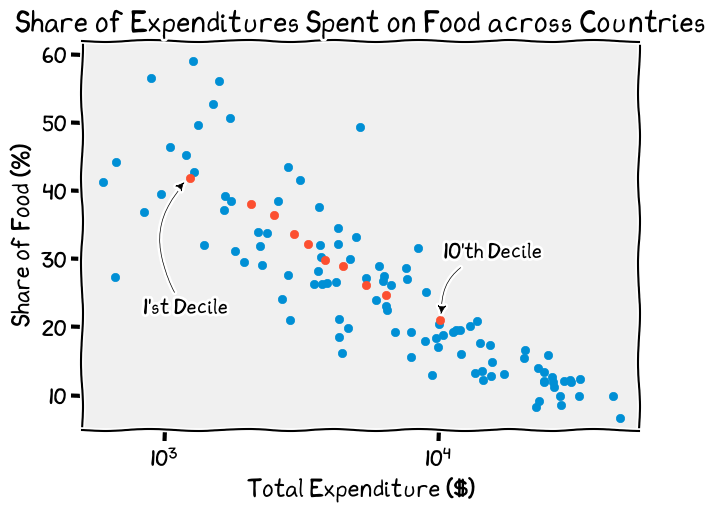

In [16]:
fig, ax = plt.subplots()

expenditures = np.array([
    24.661602659179895,
    41.25551820732785,
    49.96256282062323,
    59.08618101368512,
    66.61896941285738,
    77.05621280496382,
    89.16016450503123,
    108.62966265455768,
    127.96267120738388,
    202.24023579927916,
]) * 1000 / 20
food_ratio = np.array([
    41.94480831568477,
    38.05795648762582,
    36.542432498908454,
    33.70517931565149,
    32.23004152028418,
    29.93156268506581,
    28.93521748632223,
    26.26248395989745,
    24.754316403973796,
    21.110374637646512,
])

ir_deciles = (expenditures, food_ratio)

ax.scatter(plot_2["Total_Expenditures"], plot_2["Food_Share"])
ax.scatter(*ir_deciles)
ax.set_xscale("log", base=10)

ax.annotate(
    "1'st Decile",
    xy=(
        ir_deciles[0][0] - 40,
        ir_deciles[1][0] - 0.3,
    ),
    xytext=(
        ir_deciles[0][0] - 400,
        ir_deciles[1][0] - 20,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=-0.4",
        color="black",
    ),
)

ax.annotate(
    "10'th Decile",
    xy=(
        ir_deciles[0][-1] + 100,
        ir_deciles[1][-1] + 0.4,
    ),
    xytext=(
        ir_deciles[0][-1] + 3e2,
        ir_deciles[1][-1] + 9,
    ),
    arrowprops = dict(
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.4",
        color="black",
    ),
)


ax.set_title("Share of Expenditures Spent on Food across Countries")
ax.set_ylabel("Share of Food (%)")
ax.set_xlabel("Total Expenditure ($)")
ax.set_xlim(0.5e3, 5.4e4)
ax.set_ylim(5, 62)